In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Apriori situation dataset

dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

           ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

           ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

           ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

           ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [2]:
# Apriori preparation

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df



,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [14]:
df.columns.values

array(['Dress', 'Earrings', 'Hat', 'Heels', 'Necklace', 'Pants',
       'Sandals', 'Scarf', 'Shirt', 'Skirt', 'Sneakers', 'Sunglasses'],
      dtype=object)

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

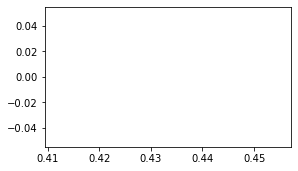

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm 

variables = [['Dress', 'Earrings', 'Hat', 'Heels', 'Necklace', 'Pants',
       'Sandals', 'Scarf', 'Shirt', 'Skirt', 'Sneakers', 'Sunglasses']]

plt.figure(figsize=(15,18))

for i in range(0,17):
    plt.subplot(6,3,i+1)
    sns.distplot(df[variables[i]].dropna(),fit=norm,)
    plt.title(variables[i])

plt.tight_layout()

In [8]:
#Support code

from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6)


,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


In [9]:
#Support with column names

frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


In [10]:
#Confidence code

from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


In [11]:
#Lift code
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.25)
rules



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf
